In [1]:
import pandas as pd
import numpy as np
import os
import csv

data_df = pd.read_csv('fulldata.csv', low_memory=False)

In [2]:
data_df.columns

Index(['period', 'team', 'team_uid', 'home_away', 'player', 'player_uid',
       'points', 'result', 'total_shots', 'type', 'type_uid', 'shot_distance',
       'converted_x', 'converted_y'],
      dtype='object')

In [3]:
values = {'shot_distance': 15.0}
data_df = data_df.fillna(value=values)
data_df.head()

,period,team,team_uid,home_away,player,player_uid,points,result,total_shots,type,type_uid,shot_distance,converted_x,converted_y
0,1,BOS,1701,0,Kyrie Irving,410587,2,1,1348,unknown,43,10,25.1,15.0
1,1,CLE,1210,1,Derrick Rose,976411,0,0,296,Layup,1,2,23.2,88.6
2,1,BOS,1701,0,Gordon Hayward,805781,0,0,2,Jump Shot,2,25,46.4,18.8
3,1,CLE,1210,1,Kevin Love,342107,0,0,1338,Jump Shot,2,16,11.9,80.7
4,1,BOS,1701,0,Jayson Tatum,221454,0,0,1451,unknown,43,3,24.0,7.3


In [4]:
data_df.head(10)

,period,team,team_uid,home_away,player,player_uid,points,result,total_shots,type,type_uid,shot_distance,converted_x,converted_y
0,1,BOS,1701,0,Kyrie Irving,410587,2,1,1348,unknown,43,10,25.1,15.0
1,1,CLE,1210,1,Derrick Rose,976411,0,0,296,Layup,1,2,23.2,88.6
2,1,BOS,1701,0,Gordon Hayward,805781,0,0,2,Jump Shot,2,25,46.4,18.8
3,1,CLE,1210,1,Kevin Love,342107,0,0,1338,Jump Shot,2,16,11.9,80.7
4,1,BOS,1701,0,Jayson Tatum,221454,0,0,1451,unknown,43,3,24.0,7.3
5,1,BOS,1701,0,Al Horford,178457,2,1,1152,Jump Shot,2,20,20.3,24.0
6,1,CLE,1210,1,Kevin Love,342107,1,1,1338,Free Throw Technical,3,15,25.0,15.0
7,1,CLE,1210,1,Jae Crowder,344172,2,1,955,Jump Shot,2,22,46.7,83.4
8,1,CLE,1210,1,Dwyane Wade,791006,2,1,969,unknown,43,12,13.3,85.5
9,1,BOS,1701,0,Jaylen Brown,184660,0,0,1351,unknown,43,1,26.1,5.6


In [5]:
y = data_df['result']
X = data_df[['period', 'team_uid', 'home_away', 'player_uid','total_shots', 'type_uid', 
             'shot_distance','converted_x', 'converted_y']]

In [6]:
from sklearn.model_selection import train_test_split

#y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
y_trainArray = np.array(y_train).reshape(-1,1)

In [8]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_trainArray)

C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 5, Train/Test Score: 0.733/0.601
k: 7, Train/Test Score: 0.711/0.609
k: 9, Train/Test Score: 0.699/0.615
k: 11, Train/Test Score: 0.690/0.619
k: 13, Train/Test Score: 0.682/0.622


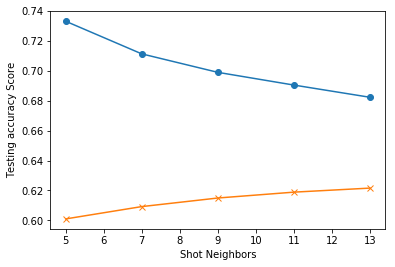

In [14]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
train_scores = []
test_scores = []

for shot in range(5, 15, 2):
    knn = KNeighborsClassifier(n_neighbors=shot)
    knn.fit(X_train_scaled, y_trainArray)
    train_score = knn.score(X_train_scaled, y_trainArray)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {shot}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


plt.plot(range(5, 15, 2), train_scores, marker='o')
plt.plot(range(5, 15, 2), test_scores, marker="x")
plt.xlabel("Shot Neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()